# Funciones de AWS Lambda (count de eventos vs. LOC)

Analizamos los counts de eventos de las funciones vs. LOC

## Cargar dependencias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# generamos DF a partir de CSV de entrada
input_file_1 = '../temp_data/code_analysis_sum_per_repo.csv'
input_file_2 = '../temp_data/event_counts_per_repo.csv'

In [3]:
df1 = pd.read_csv(input_file_1)
columns_to_remove = ['language', 'files', 'blank', 'comment']
df1 = df1.drop(columns=columns_to_remove)
df1

,project_id,code
0,0xEduardo_nodeless,1634
1,0xayot_waas,32666
2,20minutes_serverless-github-check,2270
3,20minutes_serverless-provisioned-memory-report,1006
4,2amigos_laravel-mail-api,16761
...,...,...
658,zacbe_url-shortener,3634
659,zinxon_CantekWebApp-BE,24440
660,zkcloudworker_zkcloudworker-aws,7465
661,zommerfelds_website-cz,14937


In [4]:
# removemos datos extremos de df1
loc_data = df1['code']

# calcular el rango intercuartil (IQR)
Q1 = loc_data.quantile(0.25)
Q3 = loc_data.quantile(0.75)
IQR = Q3 - Q1

# calcular el porcentaje de valores dentro de los límies del IQR
iqr_lower_bound = Q1 - 1.5 * IQR
iqr_upper_bound = Q3 + 1.5 * IQR

df1 = df1[(df1['code'] >= iqr_lower_bound) & (df1['code'] <= iqr_upper_bound)]
df1

,project_id,code
0,0xEduardo_nodeless,1634
1,0xayot_waas,32666
2,20minutes_serverless-github-check,2270
3,20minutes_serverless-provisioned-memory-report,1006
4,2amigos_laravel-mail-api,16761
...,...,...
658,zacbe_url-shortener,3634
659,zinxon_CantekWebApp-BE,24440
660,zkcloudworker_zkcloudworker-aws,7465
661,zommerfelds_website-cz,14937


In [5]:
df2 = pd.read_csv(input_file_2)
df2['common_id'] = df2['common_id'].str.replace(r'_serverless$', '', regex=True)
df2

,common_id,count
0,0xEduardo_nodeless,2
1,0xayot_waas,3
2,20minutes_serverless-github-check,5
3,2amigos_laravel-mail-api,1
4,AbstractPlay_node-backend,10
...,...,...
548,zacbe_url-shortener,4
549,zinxon_CantekWebApp-BE,1
550,zkcloudworker_zkcloudworker-aws,5
551,zommerfelds_website-cz,1


In [6]:
# removemos datos extremos de df2
event_count_data = df2['count']

# calcular el rango intercuartil (IQR)
Q1 = event_count_data.quantile(0.25)
Q3 = event_count_data.quantile(0.75)
IQR = Q3 - Q1

# calcular el porcentaje de valores dentro de los límies del IQR
iqr_lower_bound = Q1 - 1.5 * IQR
iqr_upper_bound = Q3 + 1.5 * IQR

df2 = df2[(df2['count'] >= iqr_lower_bound) & (df2['count'] <= iqr_upper_bound)]
df2

,common_id,count
0,0xEduardo_nodeless,2
1,0xayot_waas,3
2,20minutes_serverless-github-check,5
3,2amigos_laravel-mail-api,1
5,AchiraNadeeshan_Serverless-WP,1
...,...,...
548,zacbe_url-shortener,4
549,zinxon_CantekWebApp-BE,1
550,zkcloudworker_zkcloudworker-aws,5
551,zommerfelds_website-cz,1


In [7]:
merged_df = pd.merge(df1, df2, left_on='project_id', right_on='common_id', how='inner')
merged_df = merged_df.drop(columns=['common_id'])
merged_df

,project_id,code,count
0,0xEduardo_nodeless,1634,2
1,0xayot_waas,32666,3
2,20minutes_serverless-github-check,2270,5
3,2amigos_laravel-mail-api,16761,1
4,AlisProject_frontend-application,43281,2
...,...,...,...
445,zacbe_url-shortener,3634,4
446,zinxon_CantekWebApp-BE,24440,1
447,zkcloudworker_zkcloudworker-aws,7465,5
448,zommerfelds_website-cz,14937,1


In [8]:
# calculate the correlation between 'code' and 'count'
correlation = merged_df['code'].corr(merged_df['count'])

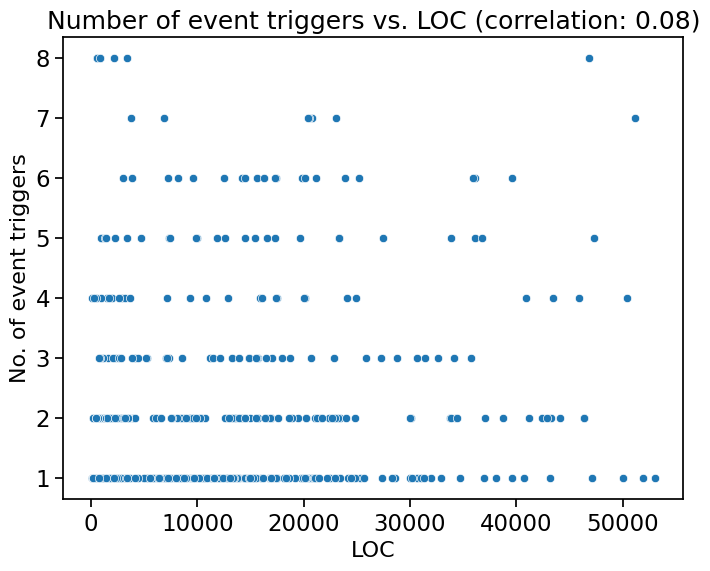

In [9]:
# create a scatter plot
plt.figure(figsize=(8, 6))
sns.set_context("notebook", font_scale=1.5)  # Adjust font_scale to increase font size
sns.scatterplot(data=merged_df, x='code', y='count')
plt.title(f'Number of event triggers vs. LOC (correlation: {correlation:.2f})', fontsize=18)
plt.xlabel('LOC' , fontsize=16)
plt.ylabel('No. of event triggers', fontsize=16)

# save the plot as a PDF
scatter_plot_pdf_file = '../paper/figs/scatter_plot_event_triggers_vs_loc.pdf'
plt.savefig(scatter_plot_pdf_file, format='pdf', dpi=300)

# display the plot
plt.show()